# Logistc Regression Classifier Recognizing Cats

**Introduction:**

Using logistic regression to build a classifier which can recogonize cats with accuracy more than 70%.

**Steps:**
1. Load the dataset and preprocess the data
2. Build the logistic regression model, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (Gradient Descent)
    - Make predictions on the test set
    - Gather all three functions into a model function
3. Train the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

## 1 - Load the dataset

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Load the dataset
X_train, Y_train, X_test, Y_test, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


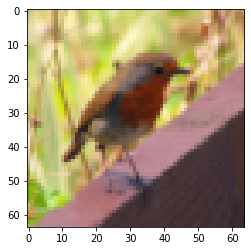

In [4]:
# example of a picture
index = 10
plt.imshow(X_train[index])
print ("y = " + str(Y_train[:, index]) + ", it's a '" + classes[np.squeeze(Y_train[:, index])].decode("utf-8") +  "' picture.")

In [5]:
X_train.shape

(209, 64, 64, 3)

In [6]:
Y_train.shape

(1, 209)

In [7]:
X_test.shape

(50, 64, 64, 3)

**Preprocess the data**

In [8]:
# Reshape X to (n_features, m_examples)
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

In [9]:
# Standardize X
X_train = X_train / 255
X_test = X_test / 255

## 2 - Build a model

In [10]:
# Sigmoid function
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

In [11]:
# initialize parameters with zeros
def initialize(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [12]:
# Forward prop & backprop
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward prop
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = - np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    cost = np.squeeze(cost)
    
    # backprop
    dZ = A - Y
    dw = np.dot(X, (A - Y).T,) / m
    db = np.sum(dZ) / m
    grad = {'dw': dw, 'db': db}
    
    return grad, cost

In [13]:
# Gradient Descent
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    m = X.shape[1]
    
    costs = []
    for i in range(num_iterations):
        grad, cost = propagate(w, b, X, Y)
        
        # update parameters
        dw, db = grad['dw'], grad['db']
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration %i: %f" %(i, cost))
    
    params = {'w': w, 'b': b}
    grads = {'dw':dw, 'db': db}
    
    return params, grads, costs

In [14]:
# Make predictions
def predict(w, b, X):
    Y = sigmoid(np.dot(w.T, X) + b)
    Y[Y > 0.5] = 1
    Y[Y <= 0.5] = 0
    return Y

In [15]:
# Merge functions above into a model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    # initialize parameters
    w, b = initialize(X_train.shape[0])
    
    # optimize the model
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # make predictions
    w, b = parameters['w'], parameters['b']
    Y_pred_train = predict(w, b, X_train)
    Y_pred_test = predict(w, b, X_test)
    
    # calculate the accuracy
    train_accuracy = (1 - np.mean(np.abs(Y_pred_train - Y_train))) * 100
    test_accuracy = (1 - np.mean(np.abs(Y_pred_test - Y_test))) * 100
    print('train accuracy :{} %'.format(train_accuracy))
    print('test accuracy: {} %'.format(test_accuracy))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## 3 - Train the model

In [16]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 1500, learning_rate = 0.003, print_cost = True)

train accuracy :96.17224880382776 %
test accuracy: 74.0 %


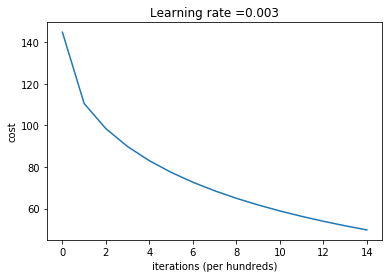

In [17]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate =' + str(d['learning_rate']))
plt.show()